In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading data
project_directory = "drive/My Drive/nflfastR-data"
szn_folders = os.listdir(f"{project_directory}")
print(szn_folders)

['play_by_play_2023.csv', 'play_by_play_2022.csv', 'play_by_play_2021.csv']


In [ ]:
#Establish which seasons we want and put them in file variable
target_seasons = [x for x in szn_folders if ('2021' in x) | ('2022' in x) | ('2023' in x)]

data_files = ([f"{project_directory}/{data_folder}" for data_folder in target_seasons])

In [ ]:
#Open data using pandas and for loop
data_frame = pd.DataFrame()

#Loop through file names and append data to data frame
for fn in data_files:
  data_frame = data_frame.append(pd.read_csv(fn))

#Resetting to index to avoid duplicates
data_frame = data_frame.reset_index(drop=True)

<ipython-input-32-3fc819e169f1>:6: DtypeWarning: Columns (45,179,180,182,183,189,190,197,198,203,204,205,206,218,219,220,222,224,226,253,254,255,260,262,263,283,284,332) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = data_frame.append(pd.read_csv(fn))
<ipython-input-32-3fc819e169f1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.read_csv(fn))
<ipython-input-32-3fc819e169f1>:6: DtypeWarning: Columns (179,180,182,183,189,190,193,194,197,198,203,204,205,206,218,219,220,222,224,226,243,244,245,253,254,255,260,262,263,283,284,301) have mixed types. Specify dtype option on import or set low_memory=False.
  data_frame = data_frame.append(pd.read_csv(fn))
<ipython-input-32-3fc819e169f1>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_fr

In [ ]:
#Show some results
data_frame.head(10)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
0,1,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,NaN,NaN,NaN,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.336103,NaN,NaN,NaN,NaN,NaN,0.515058,-51.505846
3,77,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.703308,0.340652,3.328642,1.0,0.996628,0.583928,0.661106,33.889407
4,102,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,0.469799,NaN,NaN,NaN,NaN,NaN,0.196065,-19.606467
5,124,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.521544,0.234473,4.626063,3.0,0.999221,0.979605,0.495536,50.446376
6,147,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,1.173155,0.304367,4.480009,2.0,1.000000,0.997461,0.563005,43.699485
7,172,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.515452,1.168102,10.487875,9.0,0.472213,0.253578,0.484261,51.573908
8,197,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-0.872005,0.908345,4.576524,3.0,0.441858,0.276978,0.709240,29.076004
9,220,2023_01_ARI_WAS,2023091007,WAS,ARI,REG,1,WAS,home,ARI,...,0,1,-1.430719,1.737459,9.858206,8.0,0.298202,0.298202,0.984240,1.576006


In [ ]:
#Show sample of rows
data_frame.sample(5)

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,out_of_bounds,home_opening_kickoff,qb_epa,xyac_epa,xyac_mean_yardage,xyac_median_yardage,xyac_success,xyac_fd,xpass,pass_oe
146621,594,2021_18_NE_MIA,2022010907,MIA,NE,REG,18,NE,away,MIA,...,0,1,0.483346,NaN,NaN,NaN,NaN,NaN,0.388436,-38.843578
52703,3463,2022_02_ATL_LA,2022091807,LA,ATL,REG,2,NaN,NaN,NaN,...,0,0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35566,3172,2023_14_MIN_LV,2023121007,LV,MIN,REG,14,LV,home,MIN,...,0,1,-0.791546,NaN,NaN,NaN,NaN,NaN,0.511750,-51.175046
53817,2019,2022_02_MIA_BAL,2022091800,BAL,MIA,REG,2,MIA,away,BAL,...,0,1,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22941,4043,2023_09_MIN_ATL,2023110501,ATL,MIN,REG,9,ATL,home,MIN,...,0,1,0.965504,NaN,NaN,NaN,NaN,NaN,0.533152,-53.315169


In [ ]:
#Look at all columns in the frame
data_frame.columns.values

array(['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
       'season_type', 'week', 'posteam', 'posteam_type', 'defteam',
       'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', 'posteam_score'

In [ ]:
#Finding correlation to passing yards

#Basic QB stats

qb_stats = ['season', 'passer_id', 'passer', 'pass', 'complete_pass', 'interception', 'sack', 'touchdown', 'yards_gained', 'qb_epa']

#Group by season and passer

group_qb_stats = ['season', 'passer_id', 'passer']

#Group by and aggregate by sum
qb_df = (data_frame.loc[:, qb_stats].groupby(group_qb_stats, as_index = False).sum())

#Random sample of 5 QB seasons
qb_df.sample(5)

,season,passer_id,passer,pass,complete_pass,interception,sack,touchdown,yards_gained,qb_epa
213,2022,00-0036326,C.Claypool,1,1.0,0.0,0.0,1.0,1.0,2.553211
29,2021,00-0030506,T.Kelce,1,1.0,0.0,0.0,1.0,2.0,0.702046
271,2023,00-0033275,P.Walker,134,54.0,5.0,11.0,1.0,601.0,-28.435273
197,2022,00-0035156,J.Fox,1,1.0,0.0,0.0,0.0,6.0,2.952599
57,2021,00-0033106,J.Goff,568,332.0,8.0,35.0,21.0,3040.0,-8.991420


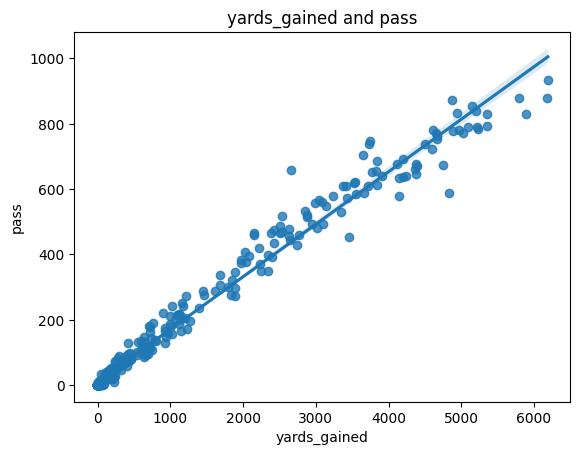

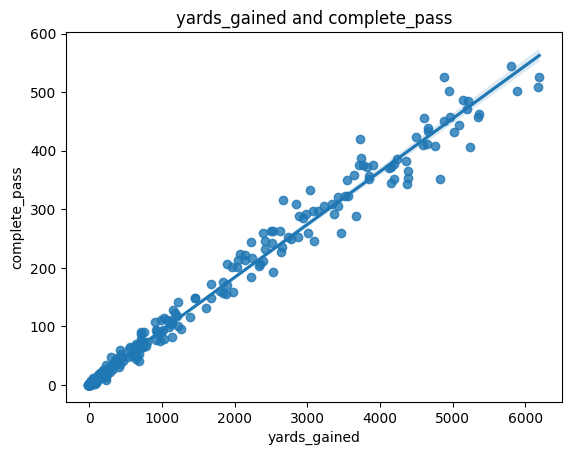

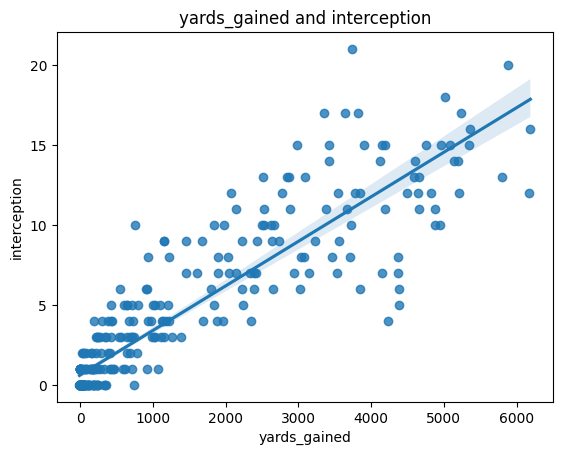

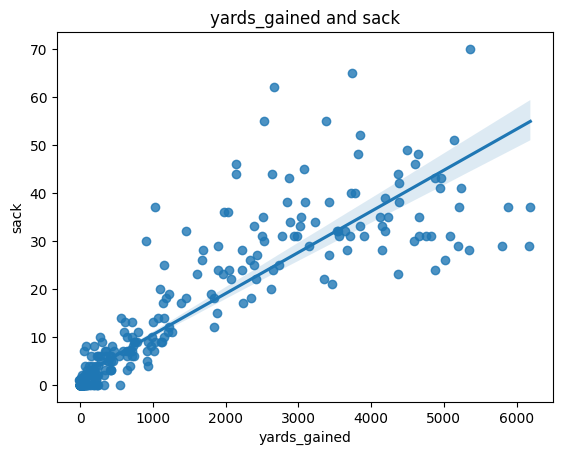

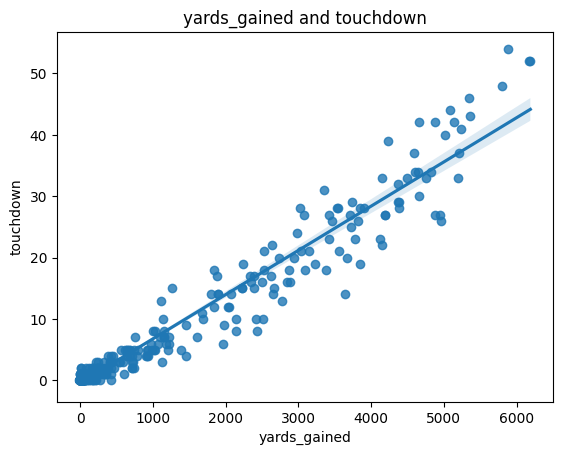

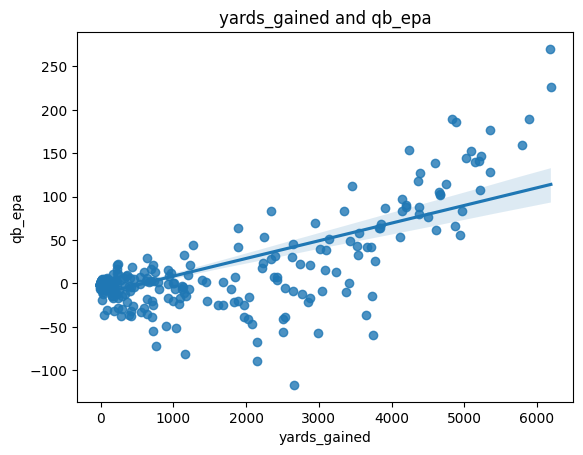

In [ ]:
#Let's analyze what correlates with passing yards
for y in ['pass', 'complete_pass', 'interception', 'sack', 'touchdown', 'qb_epa']:
  sns.regplot(data = qb_df, x = 'yards_gained', y = y)
  plt.title(f"yards_gained and {y}")
  plt.show()

In [ ]:
#Let's see if these correlate with the next season's passing yards

_df = qb_df.copy()

#Add one to the season
_df['season'] = _df['season'].add(1)

#Merge back to original data frame
new_qb_df = (qb_df.merge(_df, on=['season', 'passer_id', 'passer'], suffixes = ('', '_prev'), how = 'left'))

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,touchdown,yards_gained,qb_epa,pass_prev,complete_pass_prev,interception_prev,sack_prev,touchdown_prev,yards_gained_prev,qb_epa_prev
285,2023,00-0034401,M.White,6,5.0,1.0,0.0,2.0,74.0,-7.240902,188.0,103.0,4.0,9.0,3.0,1120.0,-6.813705
288,2023,00-0034438,L.Woodside,6,3.0,1.0,1.0,0.0,26.0,-9.753705,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,2022,00-0035993,T.Huntley,174,92.0,4.0,9.0,4.0,931.0,-0.060645,242.0,122.0,4.0,18.0,6.0,1177.0,-14.356450
182,2022,00-0034177,T.Boyle,9,2.0,2.0,0.0,0.0,33.0,-5.456479,100.0,61.0,6.0,0.0,3.0,542.0,-1.065962
314,2023,00-0036322,J.Jefferson,1,0.0,0.0,0.0,0.0,0.0,-0.393326,4.0,3.0,0.0,0.0,0.0,40.0,1.147559
168,2022,00-0033319,N.Mullens,27,21.0,1.0,0.0,1.0,230.0,11.669350,30.0,20.0,0.0,0.0,1.0,147.0,3.148745
151,2022,00-0031544,A.Cooper,1,0.0,1.0,0.0,0.0,0.0,-4.980502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2021,00-0027688,C.McCoy,114,74.0,1.0,6.0,3.0,713.0,20.977484,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,2023,00-0034960,J.Meyers,4,2.0,0.0,0.0,2.0,17.0,2.345017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,2022,00-0034418,C.Wilson,1,0.0,0.0,1.0,0.0,-6.0,-1.252624,3.0,3.0,0.0,0.0,0.0,88.0,5.749040


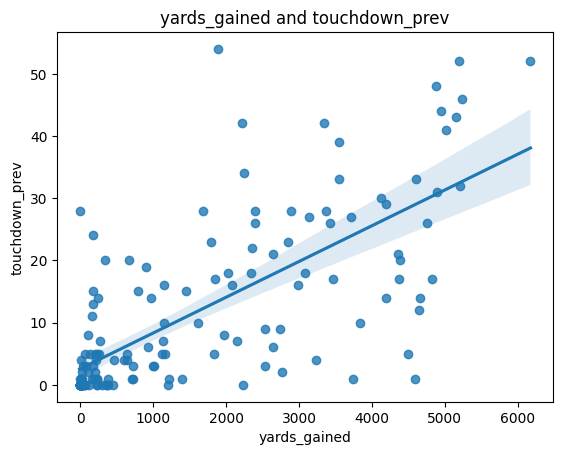

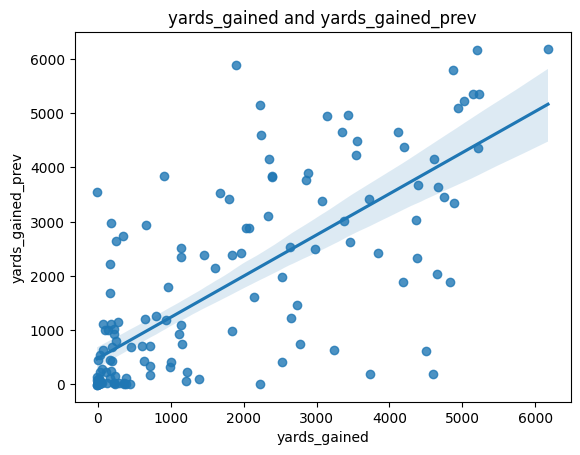

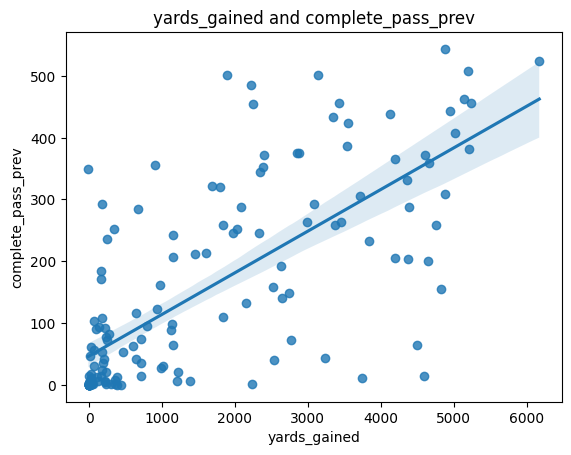

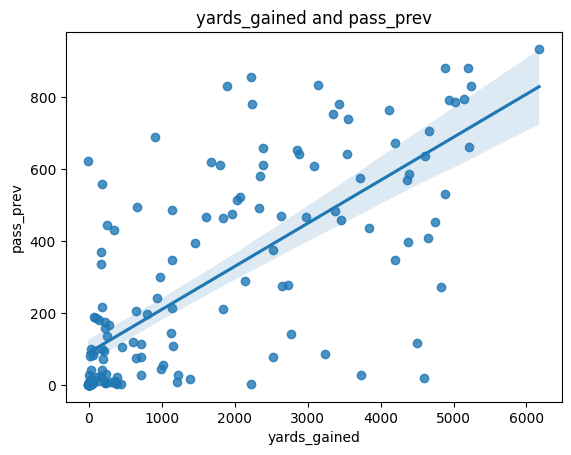

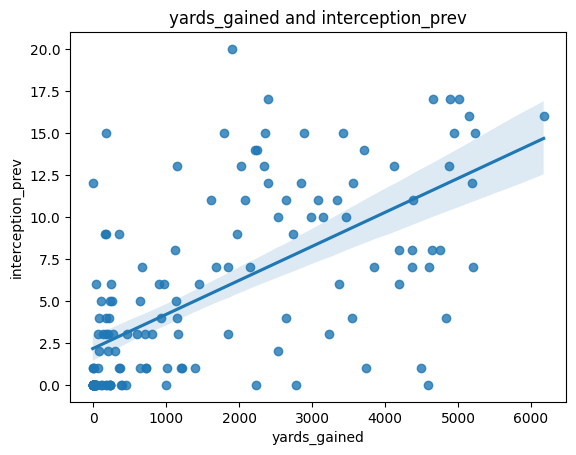

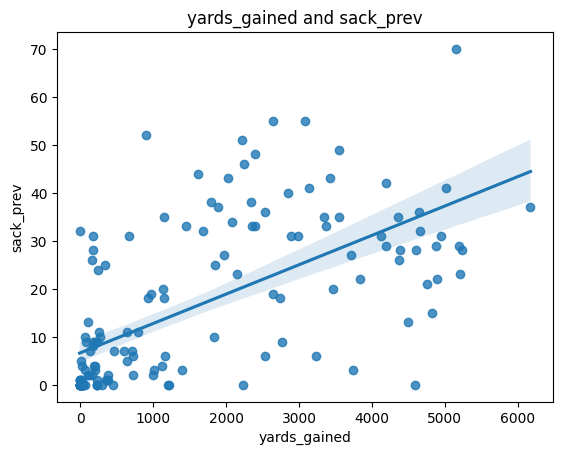

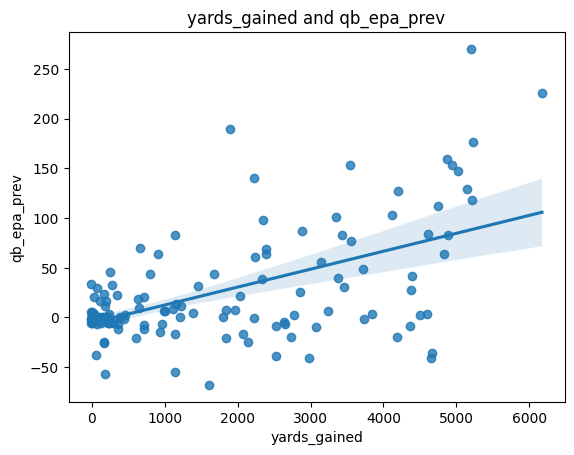

In [ ]:
#Let's see what correlates with next season's yards gained
for y in ['touchdown_prev', 'yards_gained_prev', 'complete_pass_prev', 'pass_prev', 'interception_prev', 'sack_prev', 'qb_epa_prev']:
  sns.regplot(data = new_qb_df, x = 'yards_gained', y = y)
  plt.title(f"yards_gained and {y}")
  plt.show()

In [ ]:
#Machine learning and stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

new_qb_df.sample(10)

,season,passer_id,passer,pass,complete_pass,interception,sack,touchdown,yards_gained,qb_epa,pass_prev,complete_pass_prev,interception_prev,sack_prev,touchdown_prev,yards_gained_prev,qb_epa_prev
343,2023,00-0038391,S.Clifford,1,1.0,0.0,0.0,0.0,37.0,2.143627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,2021,00-0034860,D.Pettis,1,1.0,0.0,0.0,0.0,16.0,0.980885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,2022,00-0028986,C.Keenum,7,2.0,0.0,0.0,0.0,8.0,-5.786274,81.0,47.0,1.0,5.0,4.0,452.0,-4.302372
262,2023,00-0032156,T.Siemian,177,86.0,4.0,8.0,3.0,719.0,-54.571167,29.0,15.0,1.0,2.0,1.0,176.0,-7.303776
197,2022,00-0035156,J.Fox,1,1.0,0.0,0.0,0.0,6.0,2.952599,3.0,2.0,0.0,0.0,0.0,38.0,5.192359
76,2021,00-0034401,M.White,146,88.0,8.0,4.0,5.0,935.0,8.232712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,2022,00-0035040,D.Blough,70,38.0,2.0,5.0,2.0,385.0,-3.377212,2.0,0.0,0.0,1.0,0.0,0.0,-0.586075
111,2021,00-0036322,J.Jefferson,4,2.0,0.0,0.0,0.0,35.0,1.253336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,2022,00-0026143,M.Ryan,534,309.0,13.0,38.0,16.0,2850.0,-21.191313,652.0,375.0,12.0,40.0,23.0,3773.0,25.957948
286,2023,00-0034418,C.Wilson,1,0.0,0.0,1.0,0.0,-7.0,-1.357452,1.0,0.0,0.0,1.0,0.0,-6.0,-1.252624


In [ ]:
#Train and test data

#Use previous season performance as features for model
features = ['pass_prev', 'complete_pass_prev', 'interception_prev', 'sack_prev', 'yards_gained_prev', 'touchdown_prev', 'qb_epa_prev']

#Predicting current season passing yards
target = 'yards_gained'

#Make subset with no null values
model_data = (new_qb_df.dropna(subset=features+[target]))

#Train on 2021 data
train_data = (model_data.loc[model_data['season'] == 2022])

#Test on 2022 data
test_data = (model_data.loc[model_data['season'] == 2023])

#Initialize regression
model = LinearRegression()

#Fit model on training data
model.fit(train_data.loc[:, features], train_data[target])

#Predict on the test data
preds = model.predict(test_data.loc[:,features])

#Set index so predictions match rows
preds = pd.Series(preds, index = test_data.index)

#Join predictions to test data set
test_data['preds'] = preds




<ipython-input-41-4b88c7efa7dd>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['preds'] = preds


In [ ]:
#Check quality of predictions
rmse = mean_squared_error(test_data['yards_gained'], test_data['preds']**0.5)
r2 = pearsonr(test_data['yards_gained'], test_data['preds'])[0]**2
print(f"rmse: {rmse}\nr2: {r2}")

rmse: 5373388.865403363
r2: 0.33234345076991384


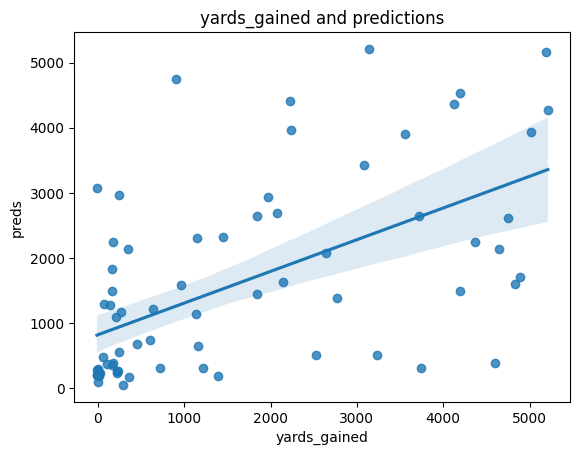

In [ ]:
#Visualizing outputs
sns.regplot(data=test_data, x = 'yards_gained', y = 'preds')
plt.title('yards_gained and predictions')
plt.show()

In [ ]:
test_data.loc[:, ['season', 'passer', 'yards_gained', 'preds']]

,season,passer,yards_gained,preds
239,2023,A.Rodgers,-10.0,3076.689333
240,2023,J.Flacco,1839.0,1448.829251
241,2023,M.Stafford,4192.0,1484.087783
242,2023,B.Hoyer,223.0,253.208548
244,2023,B.Gabbert,223.0,227.979724
...,...,...,...,...
337,2023,B.Purdy,4830.0,1594.518956
338,2023,K.Pickett,1968.0,2939.336626
339,2023,B.Zappe,1157.0,637.213030
341,2023,D.Ridder,2772.0,1378.519268
